###Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

###Load the data

In [43]:
data = pd.read_csv('/content/healthcare_data.csv')

In [44]:
same_data = data.copy()
same_data

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.409,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.836,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.734,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.270,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,gynecology,F,Dr Sarah,2,43001,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.796,10
499996,13,gynecology,F,Dr Olivia,8,85601,31-40,Female,Emergency,Moderate,Other,2,No,4631.550,11
499997,2,gynecology,B,Dr Sarah,3,22447,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930,8
499998,2,radiotherapy,A,Dr John,1,29957,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.128,23


###Get data info

In [45]:
same_data.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.409,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.836,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.734,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.270,34


In [46]:
same_data.shape

(500000, 15)

In [47]:
same_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  500000 non-null  int64  
 1   Department                         500000 non-null  object 
 2   Ward_Facility_Code                 500000 non-null  object 
 3   doctor_name                        500000 non-null  object 
 4   staff_available                    500000 non-null  int64  
 5   patientid                          500000 non-null  int64  
 6   Age                                500000 non-null  object 
 7   gender                             500000 non-null  object 
 8   Type of Admission                  500000 non-null  object 
 9   Severity of Illness                500000 non-null  object 
 10  health_conditions                  348112 non-null  object 
 11  Visitors with Patient              5000

In [48]:
data['patientid'] #data series

0          33070
1          34808
2          44577
3           3695
4         108956
           ...  
499995     43001
499996     85601
499997     22447
499998     29957
499999     45008
Name: patientid, Length: 500000, dtype: int64

In [49]:
data['patientid'].value_counts() # to check how many occurences of a particular unique value

patientid
126719    21
125695    21
44572     21
126623    21
125625    19
          ..
37634      1
91436      1
118936     1
52366      1
105506     1
Name: count, Length: 126399, dtype: int64

###Drop unecessary columns for the analysis

In [50]:
data = data.drop(columns=['patientid'])
data

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.409,8
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.836,9
2,2,gynecology,B,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.734,7
3,4,gynecology,D,Dr Olivia,7,31-40,Female,Urgent,Moderate,NaN,4,No,4814.149,8
4,2,anesthesia,E,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.270,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,4,gynecology,F,Dr Sarah,2,11-20,Female,Trauma,Minor,High Blood Pressure,3,No,4105.796,10
499996,13,gynecology,F,Dr Olivia,8,31-40,Female,Emergency,Moderate,Other,2,No,4631.550,11
499997,2,gynecology,B,Dr Sarah,3,11-20,Female,Emergency,Moderate,High Blood Pressure,2,No,5456.930,8
499998,2,radiotherapy,A,Dr John,1,61-70,Female,Trauma,Extreme,Diabetes,2,No,4694.128,23


###Checking for duplicates

In [51]:
data.duplicated().sum()

0

In [52]:
data.describe().T #descriptive statistics for continuous variables

,count,mean,std,min,25%,50%,75%,max
Available Extra Rooms in Hospital,500000.000,3.639,2.698,0.000,2.000,3.000,4.000,24.000
staff_available,500000.000,5.020,3.158,0.000,2.000,5.000,8.000,10.000
Visitors with Patient,500000.000,3.549,2.241,0.000,2.000,3.000,4.000,32.000
Admission_Deposit,500000.000,4722.316,1047.324,1654.005,4071.715,4627.004,5091.613,10104.726
Stay (in days),500000.000,12.381,7.913,3.000,8.000,9.000,11.000,51.000


###Categorical columns

In [53]:
cat_col = data.select_dtypes('object').columns
cat_col

Index(['Department', 'Ward_Facility_Code', 'doctor_name', 'Age', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance'], dtype='object')

In [54]:
for col in cat_col:
  print(col)
  print(data[col].value_counts(1)) #passing the argument 1 will normalize the values, it will give a proportion of the total instead of a number
  print('-'*50)

Department
Department
gynecology           0.687
radiotherapy         0.169
anesthesia           0.088
TB & Chest disease   0.046
surgery              0.010
Name: proportion, dtype: float64
--------------------------------------------------
Ward_Facility_Code
Ward_Facility_Code
F   0.241
D   0.238
B   0.208
E   0.191
A   0.093
C   0.029
Name: proportion, dtype: float64
--------------------------------------------------
doctor_name
doctor_name
Dr Sarah    0.199
Dr Olivia   0.197
Dr Sophia   0.150
Dr Nathan   0.142
Dr Sam      0.111
Dr John     0.103
Dr Mark     0.089
Dr Isaac    0.007
Dr Simon    0.004
Name: proportion, dtype: float64
--------------------------------------------------
Age
Age
21-30    0.320
31-40    0.267
41-50    0.161
11-20    0.093
61-70    0.053
51-60    0.043
71-80    0.037
81-90    0.016
0-10     0.007
91-100   0.003
Name: proportion, dtype: float64
--------------------------------------------------
gender
gender
Female   0.742
Male     0.207
Other    0.051
Name: 

###Univariate analysis - Plots

In [55]:
import matplotlib.pyplot as plt

In [56]:
def histogram_boxplot(data, feature, figsize=(12,7), kde=True, bins= None): #function to create both a histogram and a boxplot
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=figsize)  #the boxplot and the histogram share the x -axis
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color = 'violet')

    if bins == None:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist)
    else:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)

    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')


###Visualize the dependant variable

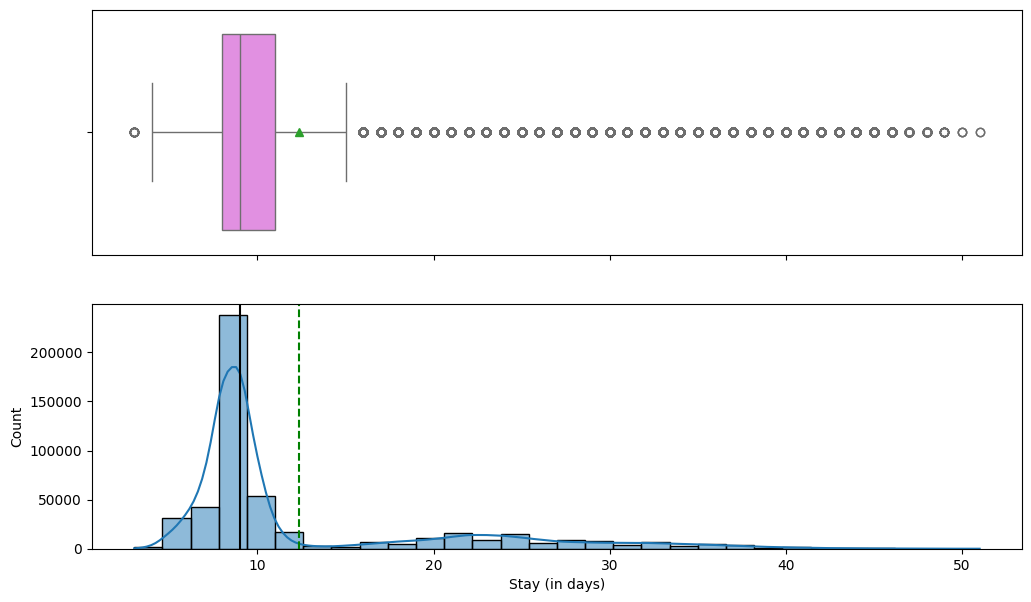

In [57]:
histogram_boxplot(data, 'Stay (in days)', bins = 30)

###Visualize other variables

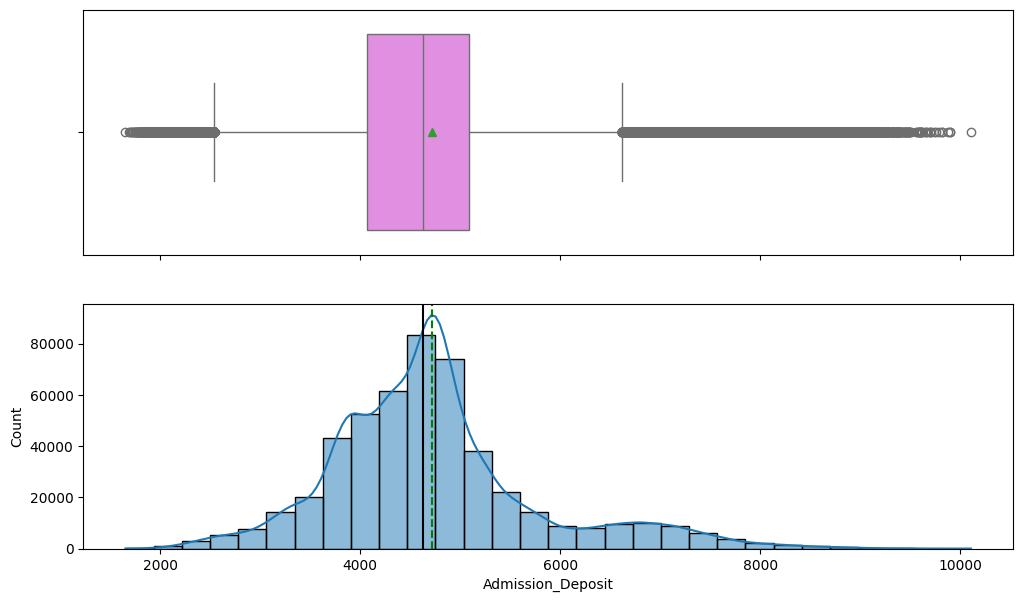

In [58]:
histogram_boxplot(data, 'Admission_Deposit', bins = 30)

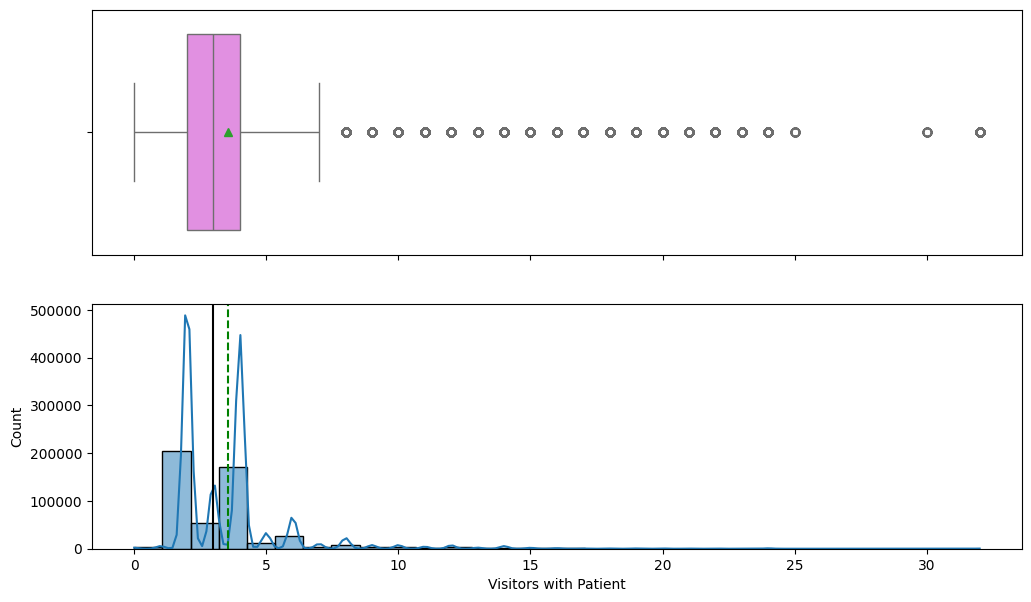

In [59]:
histogram_boxplot(data, 'Visitors with Patient', bins = 30)

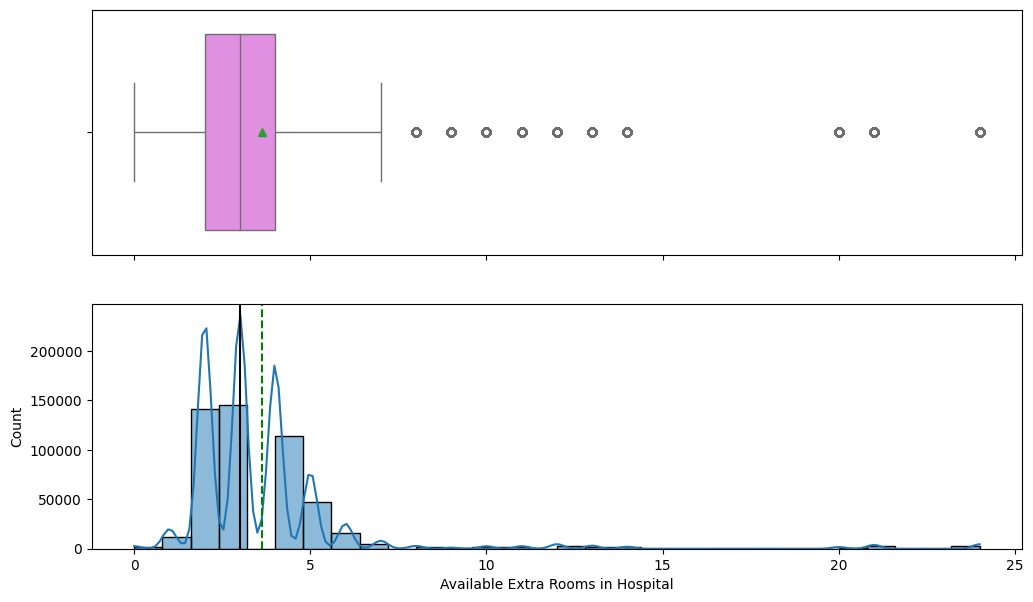

In [60]:
histogram_boxplot(data, 'Available Extra Rooms in Hospital', bins = 30)

###Observations:

###Bivariate analysis - correlations

In [61]:
only_numeric = data.select_dtypes('number')
only_numeric

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days)
0,4,0,4,2966.409,8
1,4,2,2,3554.836,9
2,2,8,2,5624.734,7
3,4,7,4,4814.149,8
4,2,10,2,5169.270,34
...,...,...,...,...,...
499995,4,2,3,4105.796,10
499996,13,8,2,4631.550,11
499997,2,3,2,5456.930,8
499998,2,1,2,4694.128,23


In [62]:
only_numeric.corr()

,Available Extra Rooms in Hospital,staff_available,Visitors with Patient,Admission_Deposit,Stay (in days)
Available Extra Rooms in Hospital,1.000,-0.002,0.070,-0.050,-0.019
staff_available,-0.002,1.000,0.001,0.001,0.007
Visitors with Patient,0.070,0.001,1.000,-0.069,0.027
Admission_Deposit,-0.050,0.001,-0.069,1.000,0.044
Stay (in days),-0.019,0.007,0.027,0.044,1.000


<Axes: >

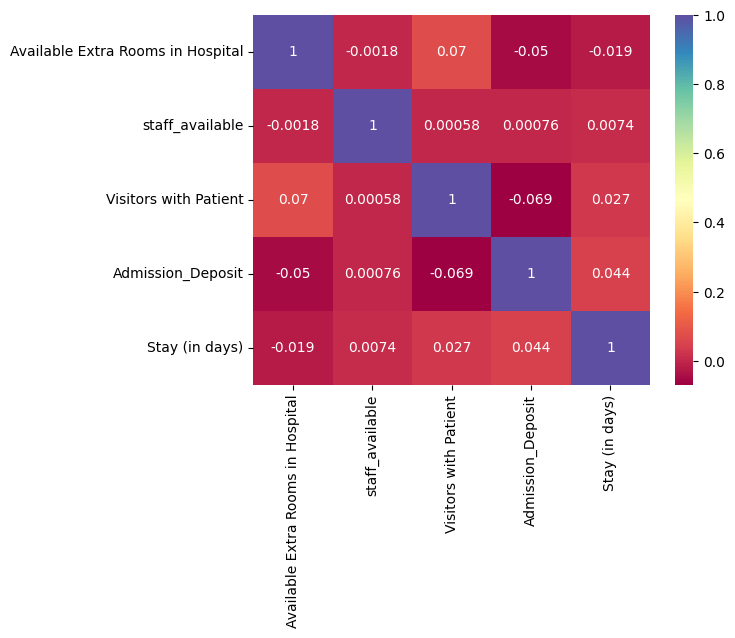

In [63]:
sns.heatmap(only_numeric.corr(), annot=True, cmap='Spectral')

<Axes: xlabel='Stay (in days)', ylabel='Ward_Facility_Code'>

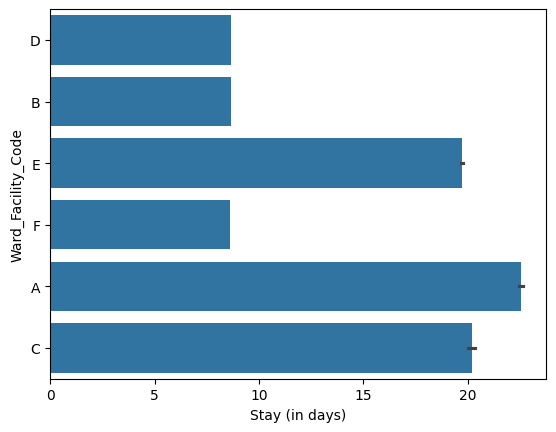

In [64]:
sns.barplot(x="Stay (in days)", y ="Ward_Facility_Code",data=data)

In [65]:
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by = sorter, ascending=False)
    print(tab1)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by = sorter, ascending=False)
    tab.plot(kind='bar', stacked=True, figsize=(count+1, 5))
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), frameon= True)
    plt.show()

A stacked barplot can be used to visualize the effect of two categorical variables on the dependent variable. It helps in comparing the distribution of the dependent variable across different categories of the two independent variables.
To visualize the total contribution of each category while maintaining the information about the individual categories within each group.

Department          TB & Chest disease  anesthesia  gynecology  radiotherapy  surgery     All
Ward_Facility_Code                                                                           
A                                 4709       15611           0         21093     5138   46551
All                              22890       44179      343478         84315     5138  500000
B                                    0           0      103885             0        0  103885
C                                 1319        4199           0          9079        0   14597
D                                    0           0      119055             0        0  119055
E                                16862       24369           0         54143        0   95374
F                                    0           0      120538             0        0  120538


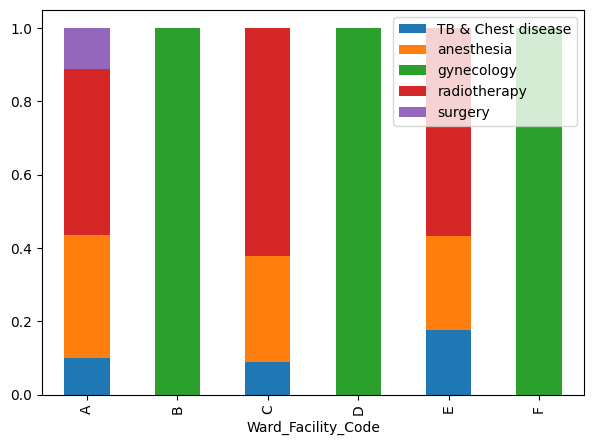

In [66]:
stacked_barplot(data, 'Ward_Facility_Code', 'Department')

###Exploratory Data Analysis

Severity of Illness  Extreme   Minor  Moderate     All
Ward_Facility_Code                                    
All                    88266  131537    280197  500000
D                      29549   27220     62286  119055
B                      24222   23579     56084  103885
A                      13662    7877     25012   46551
E                      11488   22254     61632   95374
F                       5842   47594     67102  120538
C                       3503    3013      8081   14597


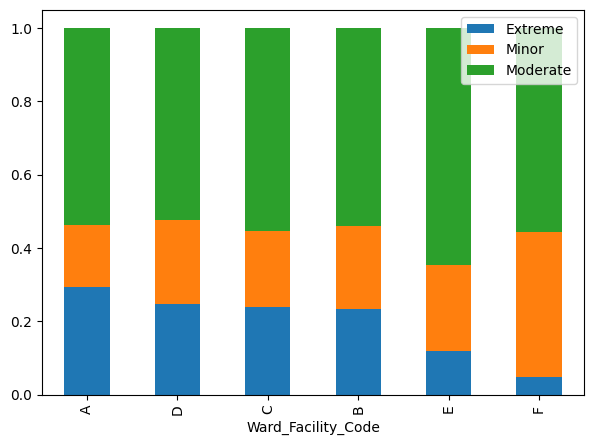

In [67]:
stacked_barplot(data, 'Ward_Facility_Code', 'Severity of Illness')

<Axes: xlabel='Stay (in days)', ylabel='Age'>

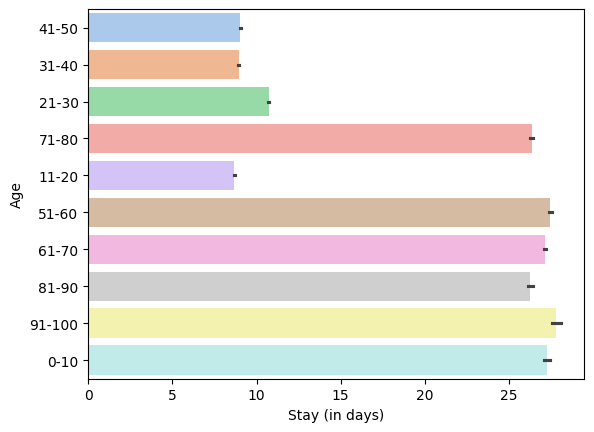

In [68]:
sns.barplot(y="Age", x="Stay (in days)", data=data, palette = 'pastel')

In [69]:
data.groupby(['doctor_name'])['Department'].count()

doctor_name
Dr Isaac      3359
Dr John      51263
Dr Mark      44410
Dr Nathan    70777
Dr Olivia    98352
Dr Sam       55711
Dr Sarah     99596
Dr Simon      1779
Dr Sophia    74753
Name: Department, dtype: int64

in a groupby() operation, a DataFrame or Series object is split into groups based on one or more columns. A function is applied to each group, and the results are combined into a new object.

In [70]:
data.groupby(['doctor_name'])['Department'].agg(Department_name= 'unique', Patients_treated = 'count')

,Department_name,Patients_treated
doctor_name,,
Dr Isaac,[surgery],3359
Dr John,"[TB & Chest disease, anesthesia, radiotherapy]",51263
Dr Mark,"[anesthesia, TB & Chest disease]",44410
Dr Nathan,[gynecology],70777
Dr Olivia,[gynecology],98352
Dr Sam,[radiotherapy],55711
Dr Sarah,[gynecology],99596
Dr Simon,[surgery],1779
Dr Sophia,[gynecology],74753


###Machine learning models

In [71]:
data = pd.get_dummies(
    data,
    columns = data.select_dtypes(include =['object', 'category']).columns.tolist(),
    drop_first = True
    ) #one hot encoding

In [72]:
x = data.drop('Stay (in days)', axis = 1)
y = data['Stay (in days)']

In [73]:
x.shape

(500000, 41)

In [74]:
y.shape

(500000,)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor #because the variable we are trying to predict is continuous
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV #(Grid Search Cross-Validation) used to systematically search for the best hyperparameter combinations
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #R-squared (R^2) is a metric used to measure the amount of variance in the dependent variable that is explained by the independent variables. It provides an indication of how well the model fits the data.

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [77]:
x_train.shape

(400000, 41)

In [78]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [79]:
def mape_score(targets, predictions):
    return np.mean(np.abs((targets - predictions) / targets)) * 100

In [80]:
def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)
    r2 = r2_score(target, pred)
    adjr2 = adj_r2_score(predictors, target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    mape = mape_score(target, pred)

    df_perf = pd.DataFrame(
        {
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2,
            'Adj. R2': adjr2,
            'MAPE': mape,
        },
        index = [0]
    )
    return df_perf

###Decision tree

In [81]:
x_train.isnull().values.any() #checking for NaN values

False

In [82]:
dt_regressor = DecisionTreeRegressor(random_state = 1)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [83]:
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)
dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R2,MAPE
0,1.821,1.131,0.947,0.947,9.353


In [84]:
from sklearn import tree

In [85]:
features = list(x.columns)
features

['Available Extra Rooms in Hospital',
 'staff_available',
 'Visitors with Patient',
 'Admission_Deposit',
 'Department_anesthesia',
 'Department_gynecology',
 'Department_radiotherapy',
 'Department_surgery',
 'Ward_Facility_Code_B',
 'Ward_Facility_Code_C',
 'Ward_Facility_Code_D',
 'Ward_Facility_Code_E',
 'Ward_Facility_Code_F',
 'doctor_name_Dr John',
 'doctor_name_Dr Mark',
 'doctor_name_Dr Nathan',
 'doctor_name_Dr Olivia',
 'doctor_name_Dr Sam',
 'doctor_name_Dr Sarah',
 'doctor_name_Dr Simon',
 'doctor_name_Dr Sophia',
 'Age_11-20',
 'Age_21-30',
 'Age_31-40',
 'Age_41-50',
 'Age_51-60',
 'Age_61-70',
 'Age_71-80',
 'Age_81-90',
 'Age_91-100',
 'gender_Male',
 'gender_Other',
 'Type of Admission_Trauma',
 'Type of Admission_Urgent',
 'Severity of Illness_Minor',
 'Severity of Illness_Moderate',
 'health_conditions_Diabetes',
 'health_conditions_Heart disease',
 'health_conditions_High Blood Pressure',
 'health_conditions_Other',
 'Insurance_Yes']

In [86]:
#training a decision tree especially for visualization
dt_regressor_visualize = DecisionTreeRegressor(random_state = 1, max_depth = 3)
dt_regressor_visualize.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=1)

[Text(0.5, 0.875, 'node #0\nDepartment_gynecology <= 0.5\nsquared_error = 62.529\nsamples = 400000\nvalue = 12.376'),
 Text(0.25, 0.625, 'node #1\nAge_31-40 <= 0.5\nsquared_error = 99.159\nsamples = 125029\nvalue = 20.6'),
 Text(0.125, 0.375, 'node #2\nAge_41-50 <= 0.5\nsquared_error = 77.346\nsamples = 97769\nvalue = 23.593'),
 Text(0.0625, 0.125, 'node #3\nsquared_error = 35.317\nsamples = 78897\nvalue = 26.841'),
 Text(0.1875, 0.125, 'node #4\nsquared_error = 24.593\nsamples = 18872\nvalue = 10.015'),
 Text(0.375, 0.375, 'node #5\nDepartment_anesthesia <= 0.5\nsquared_error = 30.054\nsamples = 27260\nvalue = 9.866'),
 Text(0.3125, 0.125, 'node #6\nsquared_error = 6.882\nsamples = 20019\nvalue = 6.937'),
 Text(0.4375, 0.125, 'node #7\nsquared_error = 4.769\nsamples = 7241\nvalue = 17.967'),
 Text(0.75, 0.625, 'node #8\nAvailable Extra Rooms in Hospital <= 12.5\nsquared_error = 1.13\nsamples = 274971\nvalue = 8.636'),
 Text(0.625, 0.375, 'node #9\nAdmission_Deposit <= 4605.059\nsquare

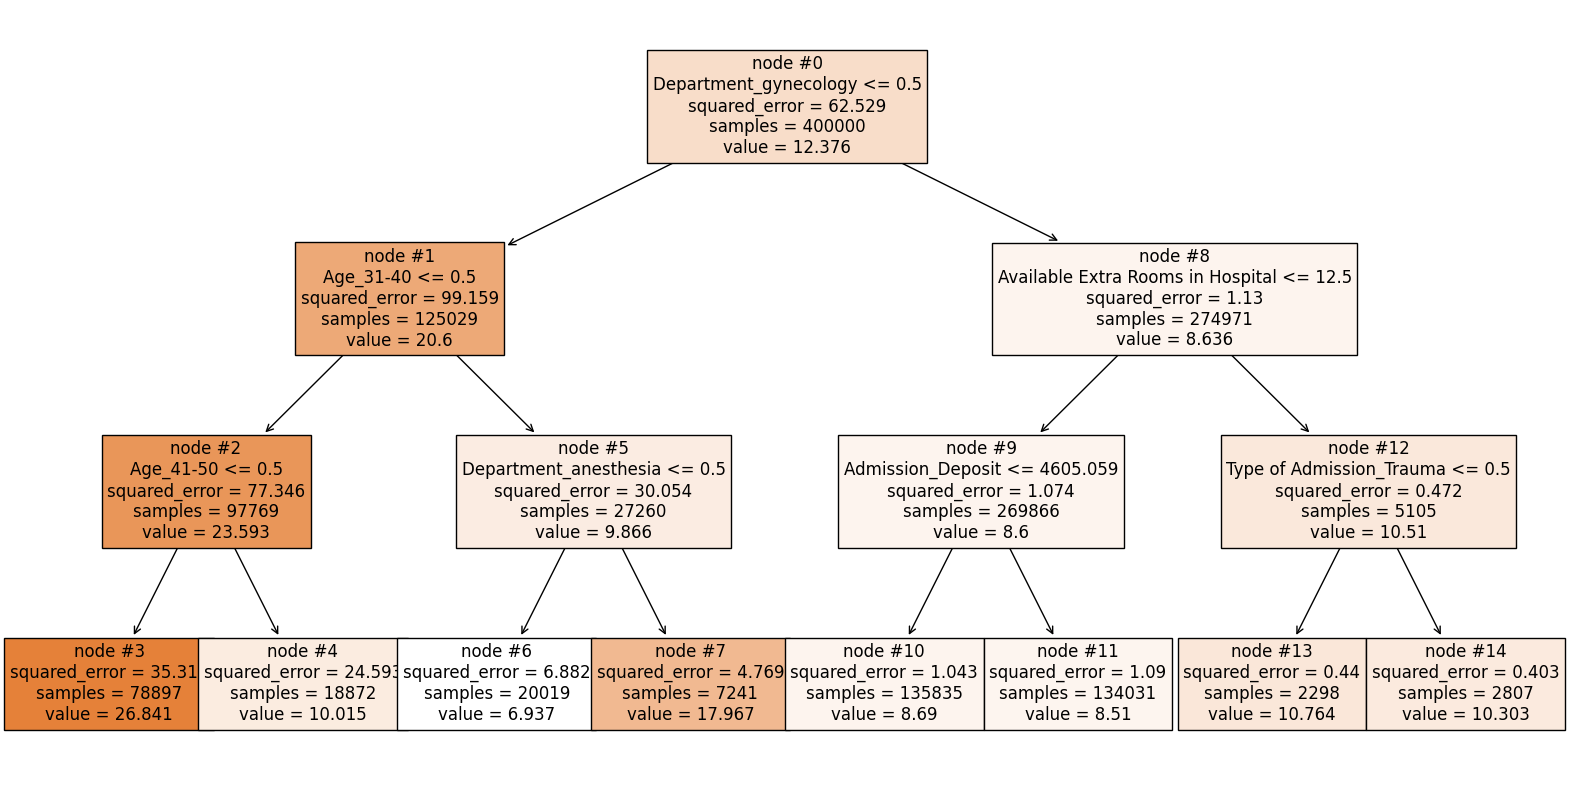

In [87]:
plt.figure(figsize = (20, 10))
tree.plot_tree(dt_regressor_visualize, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

In [88]:
print(tree.export_text(dt_regressor_visualize, feature_names = features, show_weights=True))

|--- Department_gynecology <= 0.50
|   |--- Age_31-40 <= 0.50
|   |   |--- Age_41-50 <= 0.50
|   |   |   |--- value: [26.84]
|   |   |--- Age_41-50 >  0.50
|   |   |   |--- value: [10.02]
|   |--- Age_31-40 >  0.50
|   |   |--- Department_anesthesia <= 0.50
|   |   |   |--- value: [6.94]
|   |   |--- Department_anesthesia >  0.50
|   |   |   |--- value: [17.97]
|--- Department_gynecology >  0.50
|   |--- Available Extra Rooms in Hospital <= 12.50
|   |   |--- Admission_Deposit <= 4605.06
|   |   |   |--- value: [8.69]
|   |   |--- Admission_Deposit >  4605.06
|   |   |   |--- value: [8.51]
|   |--- Available Extra Rooms in Hospital >  12.50
|   |   |--- Type of Admission_Trauma <= 0.50
|   |   |   |--- value: [10.76]
|   |   |--- Type of Admission_Trauma >  0.50
|   |   |   |--- value: [10.30]



In [89]:
bagging_estimator = BaggingRegressor(random_state = 1)
bagging_estimator.fit(x_train, y_train)

BaggingRegressor(random_state=1)

In [90]:
bagging_estimator_perf_test = model_performance_regression(bagging_estimator, x_test, y_test)
bagging_estimator_perf_test

,RMSE,MAE,R-squared,Adj. R2,MAPE
0,1.365,0.902,0.970,0.970,7.627


In [91]:
rf_regressor = RandomForestRegressor(random_state = 1)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [92]:
rf_regressor_perf_test = model_performance_regression(rf_regressor, x_test, y_test)
rf_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R2,MAPE
0,1.302,0.864,0.973,0.973,7.306


In [93]:
from sklearn.ensemble import AdaBoostRegressor

In [94]:
ada_regressor = AdaBoostRegressor(random_state = 1)
ada_regressor.fit(x_train, y_train)

AdaBoostRegressor(random_state=1)

In [95]:
ada_regressor_perf_test = model_performance_regression(ada_regressor, x_test, y_test)
ada_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R2,MAPE
0,2.375,1.587,0.910,0.910,13.624


In [96]:
from sklearn.ensemble import GradientBoostingRegressor

In [97]:
gradient_regressor = GradientBoostingRegressor(random_state = 1)
gradient_regressor.fit(x_train, y_train)

GradientBoostingRegressor(random_state=1)

In [98]:
gradient_regressor_perf_test = model_performance_regression(gradient_regressor, x_test, y_test)
gradient_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R2,MAPE
0,1.793,1.213,0.949,0.949,10.247


In [99]:
!pip install xgboost

In [100]:
from xgboost import XGBRegressor

In [101]:
xgb_regressor = XGBRegressor(random_state = 1)
xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [102]:
xgb_regressor_perf_test = model_performance_regression(xgb_regressor, x_test, y_test)
xgb_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R2,MAPE
0,1.513,1.034,0.964,0.964,8.869


###Comparing all tests

In [103]:
models_test_compare_df = pd.concat(
    [dt_regressor_perf_test.T,
     bagging_estimator_perf_test.T,
     rf_regressor_perf_test.T,
     ada_regressor_perf_test.T,
     gradient_regressor_perf_test.T,
     xgb_regressor_perf_test.T
     ],
    axis = 1)

In [104]:
models_test_compare_df

,0,0,0,0,0,0
RMSE,1.821,1.365,1.302,2.375,1.793,1.513
MAE,1.131,0.902,0.864,1.587,1.213,1.034
R-squared,0.947,0.970,0.973,0.910,0.949,0.964
Adj. R2,0.947,0.970,0.973,0.910,0.949,0.964
MAPE,9.353,7.627,7.306,13.624,10.247,8.869


In [105]:
models_test_compare_df.columns = [
    'Decision Tree',
    'Bagging',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'XGBoost']

In [107]:
models_test_compare_df.T

,RMSE,MAE,R-squared,Adj. R2,MAPE
Decision Tree,1.821,1.131,0.947,0.947,9.353
Bagging,1.365,0.902,0.970,0.970,7.627
Random Forest,1.302,0.864,0.973,0.973,7.306
AdaBoost,2.375,1.587,0.910,0.910,13.624
Gradient Boosting,1.793,1.213,0.949,0.949,10.247
XGBoost,1.513,1.034,0.964,0.964,8.869


###Fine tuning the parameters of the random forest regressor

In [108]:
rf_tuned = RandomForestRegressor(random_state = 1)

In [111]:
rf_parameters = {
    'n_estimators': [100, 110, 120],
    'max_depth': [None, 5, 7],
    'max_features': [0.8, 1]
}

In [109]:
3*3*2*5 #number of combinations includig cross-validation, computationally costly

90

In [112]:
rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = 'neg_mean_squared_error', cv = 5)
rf_grid_obj.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [None, 5, 7], 'max_features': [0.8, 1],
                         'n_estimators': [100, 110, 120]},
             scoring='neg_mean_squared_error')

In [115]:
rf_tuned_regressor = rf_grid_obj.best_estimator_
rf_tuned_regressor.fit(x_train, y_train)

RandomForestRegressor(max_features=0.8, n_estimators=120, random_state=1)

In [116]:
rf_tuned_regressor_perf_test = model_performance_regression(rf_tuned_regressor, x_test, y_test)
rf_tuned_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R2,MAPE
0,1.295,0.859,0.973,0.973,7.268


In [137]:
new_models_test_compare_df = pd.concat(
    [models_test_compare_df,
     rf_tuned_regressor_perf_test.T
     ], axis = 1
    )

new_models_test_compare_df.columns = [
    'Decision Tree',
    'Bagging',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'XGBoost',
    'Random Forest Tuned']

new_models_test_compare_df.T

,RMSE,MAE,R-squared,Adj. R2,MAPE
Decision Tree,1.821,1.131,0.947,0.947,9.353
Bagging,1.365,0.902,0.970,0.970,7.627
Random Forest,1.302,0.864,0.973,0.973,7.306
AdaBoost,2.375,1.587,0.910,0.910,13.624
Gradient Boosting,1.793,1.213,0.949,0.949,10.247
XGBoost,1.513,1.034,0.964,0.964,8.869
Random Forest Tuned,1.295,0.859,0.973,0.973,7.268


In [139]:
importances = rf_tuned_regressor.feature_importances_
importances

array([6.12357402e-03, 4.35933609e-03, 4.35547452e-03, 2.26526151e-02,
       1.06176300e-01, 4.21810255e-01, 6.21728948e-02, 1.01935132e-02,
       1.92103730e-04, 6.79710710e-04, 2.16630906e-04, 9.36486086e-04,
       2.74465343e-04, 3.19341124e-03, 3.41192579e-03, 1.29813344e-04,
       9.69493208e-05, 2.52121809e-03, 1.39159827e-04, 3.46903435e-04,
       1.12239827e-04, 1.19991399e-04, 8.57964682e-04, 1.65418256e-01,
       1.62162984e-01, 1.14381585e-03, 2.28127013e-03, 6.10857522e-04,
       3.60376482e-04, 1.18518420e-04, 8.38963151e-03, 4.30275315e-04,
       1.38424961e-03, 7.58516729e-04, 1.11276863e-03, 1.19583964e-03,
       6.60673528e-04, 4.81101990e-04, 7.24296707e-04, 8.06864197e-04,
       8.86767556e-04])

In [140]:
indices = np.argsort(importances)
indices

array([16, 20, 29, 21, 15, 18,  8, 10, 12, 19, 28, 31, 37, 27, 36,  9, 38,
       33, 39, 22, 40, 11, 34, 25, 35, 32, 26, 17, 13, 14,  2,  1,  0, 30,
        7,  3,  6,  4, 24, 23,  5])

###Plotting a figure for the most important features

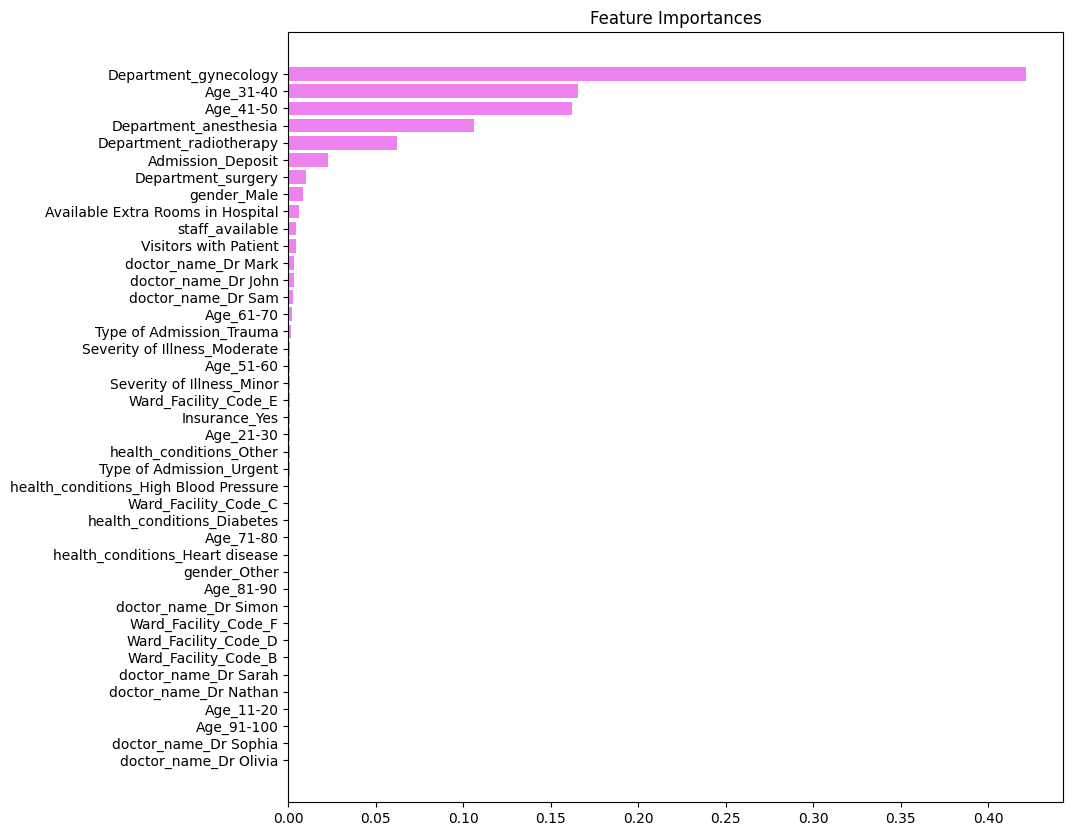

In [142]:
plt.figure(figsize = (10, 10))
plt.title('Feature Importances')
plt.barh(range(len(features)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(features)), [features[i] for i in indices]);